## Importing the Data

In [2]:
import pandas as pd

pregnancies = pd.read_csv('babies.csv')
pregnancies.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [3]:
pregnancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [4]:
pregnancies.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


array([[<Axes: title={'center': 'case'}>,
        <Axes: title={'center': 'bwt'}>,
        <Axes: title={'center': 'gestation'}>],
       [<Axes: title={'center': 'parity'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'smoke'}>, <Axes: >]], dtype=object)

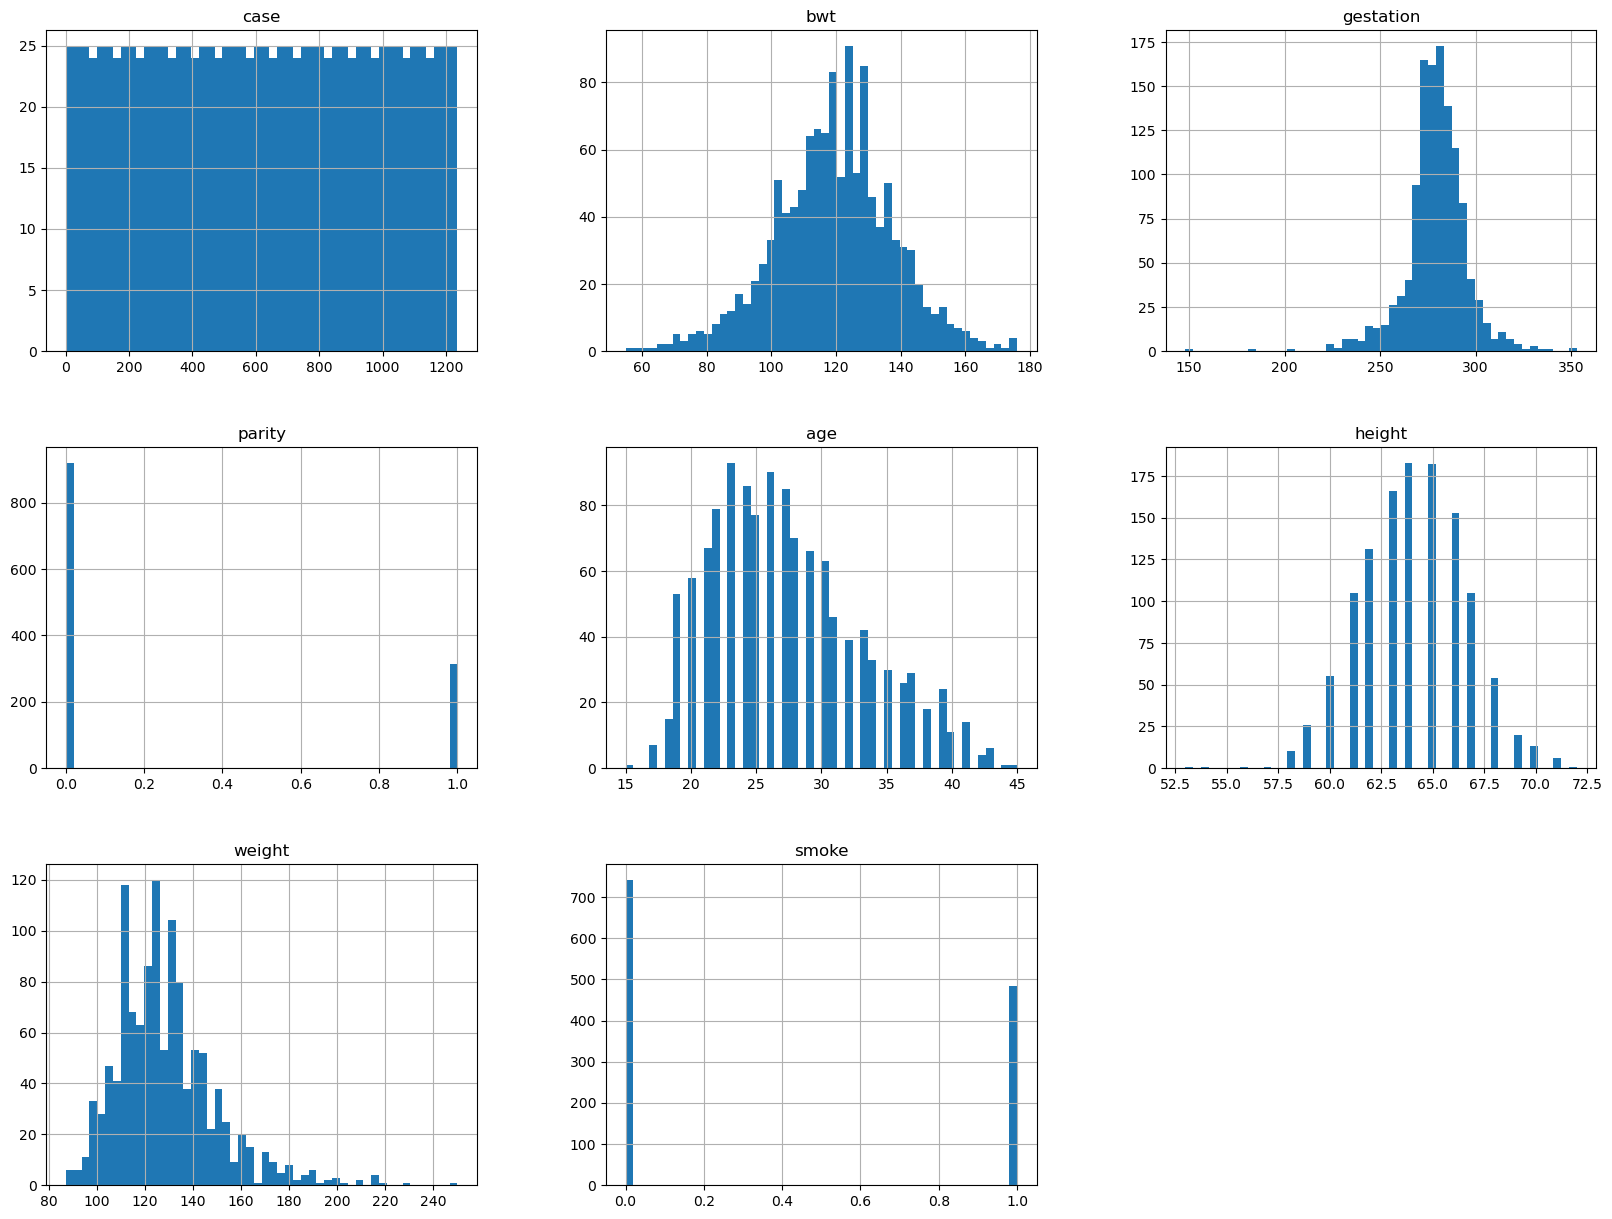

In [5]:
pregnancies.hist(bins=50, figsize=(20, 15))

In [6]:
pregnancies.corr()
# remove "age" as it has low correlation to everything else
# same thing for "parity", as older mothers' chance of having a second child is higher
# "height", "weight" have low correlation too

,case,bwt,gestation,parity,age,height,weight,smoke
case,1.000000,-0.057643,0.012473,0.201192,0.007451,-0.038316,-0.055327,-0.002348
bwt,-0.057643,1.000000,0.407854,-0.046107,0.033649,0.198519,0.154038,-0.240093
gestation,0.012473,0.407854,1.000000,0.070411,-0.056269,0.063631,0.022366,-0.067247
parity,0.201192,-0.046107,0.070411,1.000000,-0.345820,0.035056,-0.089782,-0.012815
age,0.007451,0.033649,-0.056269,-0.345820,1.000000,0.003051,0.158275,-0.070210
height,-0.038316,0.198519,0.063631,0.035056,0.003051,1.000000,0.435745,0.014441
weight,-0.055327,0.154038,0.022366,-0.089782,0.158275,0.435745,1.000000,-0.065636
smoke,-0.002348,-0.240093,-0.067247,-0.012815,-0.070210,0.014441,-0.065636,1.000000


## Train/Test Split

In [7]:
FEATURES = ['gestation', 'smoke']
FEATURES_ALT = ['gestation', 'smoke', 'height', 'weight']

## Cleaning Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pregnancies[FEATURES],
    pregnancies['bwt'],
    test_size=0.25
)

len(X_train), len(y_train), len(X_test), len(y_test)

(927, 927, 309, 309)

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputed', SimpleImputer(strategy='median')),
    ('standardized', StandardScaler()),
])

X_transformed = pipeline.fit_transform(X_train, y_train)
y_train

69      142
335     123
798     117
266     138
505     115
       ... 
698     141
1061     94
136     134
523     103
270     140
Name: bwt, Length: 927, dtype: int64

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_transformed, y_train)

LinearRegression()

In [11]:
some_data = pregnancies[FEATURES].iloc[:5]
some_labels = pregnancies['bwt'].iloc[:5]

some_data_prepared = pipeline.transform(some_data)

print(f'Predictions: {lin_reg.predict(some_data_prepared)}')
print(f'Labels: {list(some_labels)}')

Predictions: [125.0847354  124.11575463 114.01874786 123.14677386 115.47221902]
Labels: [120, 113, 128, 123, 108]


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

pregnancy_prediction = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(pregnancies['bwt'][:5], pregnancy_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8.952603488989707

In [17]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(
    lin_reg,
    X_transformed,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10
)

# sklearn cross validation expects a utility (bigger is better) rather than a cost (smaller is better) function
# so scoring function is the opposite of the MSE, which is why we compute -scores before sqrt
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([16.35810408, 16.57353228, 17.32130621, 14.55691807, 14.30590721,
       16.98144729, 15.14810526, 16.42528497, 14.14294317, 17.67138556])

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_transformed, y_train)

DecisionTreeRegressor()

In [15]:
pregnancy_prediction = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(pregnancies['bwt'][:5], pregnancy_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

12.098301799919941

In [16]:
tree_scores = cross_val_score(
    tree_reg,
    X_transformed,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10
)

# sklearn cross validation expects a utility (bigger is better) rather than a cost (smaller is better) function
# so scoring function is the opposite of the MSE, which is why we compute -scores before sqrt
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([16.21243078, 17.51227829, 19.65945409, 16.6784475 , 14.2853946 ,
       18.70342133, 17.57791898, 16.99283374, 17.03747193, 18.57740018])

## Validating with the Test Set

In [21]:
X_test_transformed = pipeline.fit_transform(X_test)
final_predictions = lin_reg.predict(X_test_transformed)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

17.074829810151538